In [1]:
!pip install wordcloud

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError('A certificate chain processed, but terminated in a root certificate which is not trusted by the trust provider.'))) - skipping


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import joblib
from wordcloud import WordCloud

# Coursera Reviews

In [3]:
# =========================
# 1. Load Dataset
# =========================
file_path = "C:\\Users\\saiva\\Desktop\\Comment mining\\Coursera_reviews.csv\\Coursera_reviews.csv" 
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)


# =========================
# 2. Basic Cleaning
# =========================
df = df[['reviews', 'rating', 'reviewers']].dropna()


# =========================
# 3. Label Sentiment
# =========================
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(label_sentiment)


# =========================
# 4. TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['reviews'])
y = df['sentiment']

Columns in dataset: Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')


In [4]:
# =========================
# 5. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
# =========================
# 6. Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# =========================
# 7. Evaluation
# =========================
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.37      0.47      6619
     Neutral       0.44      0.09      0.15      9835
    Positive       0.96      1.00      0.98    274458

    accuracy                           0.95    290912
   macro avg       0.68      0.49      0.53    290912
weighted avg       0.93      0.95      0.94    290912



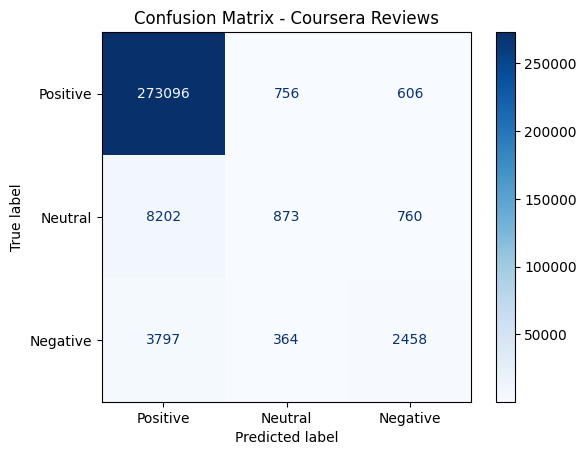

In [5]:
# =========================
# 8. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Coursera Reviews")
plt.show()

C:\Users\saiva\AppData\Local\Temp\ipykernel_23684\880806760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


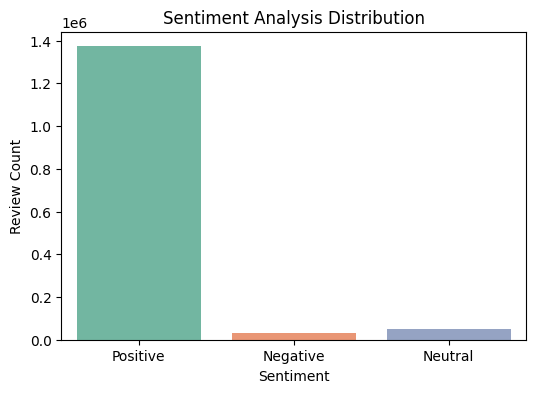

In [6]:
# =========================
# 9. Sentiment Distribution
# =========================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()


In [7]:
# =========================
# 10. Save Model
# =========================
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/coursera_model.pkl")
joblib.dump(vectorizer, "models/coursera_vectorizer.pkl")
print("Model and vectorizer saved in 'models/' folder.")


# =========================
# 11. Predict on New Reviews (Test File)
# =========================
test_file = "C:\\Users\\saiva\\Desktop\\Comment mining\\Coursera_reviews.csv\\Coursera_test.csv" 
if os.path.exists(test_file):
    test_df = pd.read_csv(test_file)
    if 'reviews' in test_df.columns:
        test_reviews = test_df['reviews'].fillna("")
        test_vectors = vectorizer.transform(test_reviews)
        test_predictions = model.predict(test_vectors)
        test_df['predicted_sentiment'] = test_predictions

        print("\nPredictions on New Reviews:")
        print(test_df)

        # Save results
        test_df.to_csv("test_coursera_reviews_with_predictions.csv", index=False)
        print("\nSaved predictions to 'test_coursera_reviews_with_predictions.csv'")
    else:
        print(f"Column 'reviews' not found in {test_file}.")
else:
    print(f"Test file '{test_file}' not found. Skipping prediction.")


Model and vectorizer saved in 'models/' folder.

Predictions on New Reviews:
                                             reviews predicted_sentiment
0  This course was extremely helpful and well-org...            Positive
1  I found the material confusing and hard to fol...            Negative
2  The instructor was average, and the content la...             Neutral
3   Amazing course! Highly recommended for beginners            Positive
4   Too many technical issues in the video lectures.            Positive

Saved predictions to 'test_coursera_reviews_with_predictions.csv'


# Employee Reviews

In [8]:
# =========================
# 1. Load Dataset
# =========================
file_path = "C:\\Users\\saiva\\Desktop\\Comment mining\\employee_reviews.csv\\employee_reviews.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)

# =========================
# 2. Basic Cleaning
# =========================
df = df[['review', 'overall_rating']].dropna()

# =========================
# 3. Label Sentiment
# =========================
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['overall_rating'].apply(label_sentiment)


Columns in dataset: Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'review', 'pros', 'cons'],
      dtype='object')


In [9]:
# =========================
# 4. TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

# =========================
# 5. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 6. Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# =========================
# 7. Evaluation
# =========================
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.40      0.50     26698
     Neutral       0.49      0.19      0.27     38833
    Positive       0.70      0.94      0.80    101665

    accuracy                           0.68    167196
   macro avg       0.62      0.51      0.53    167196
weighted avg       0.65      0.68      0.63    167196



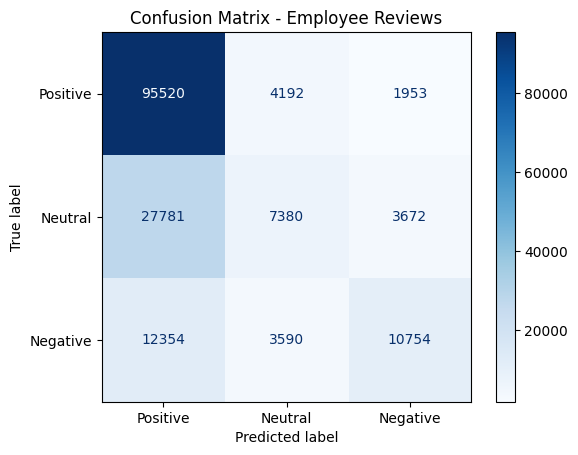

In [11]:
# =========================
# 8. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Employee Reviews")
plt.show()

C:\Users\saiva\AppData\Local\Temp\ipykernel_3440\673350926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


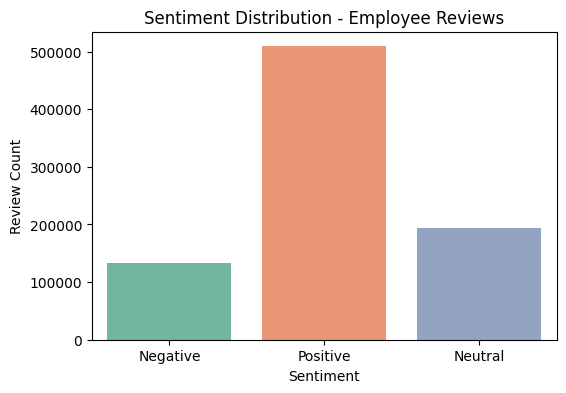

In [12]:
# =========================
# 9. Sentiment Distribution
# =========================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution - Employee Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()


In [13]:
# =========================
# 10. WordClouds for Pros and Cons
# =========================
if 'pros' in df.columns and 'cons' in df.columns:
    for column in ['pros', 'cons']:
        text = " ".join(df[column].dropna().astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"WordCloud - {column.capitalize()}")
        plt.show()


# =========================
# 11. Save Model
# =========================
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/employee_model.pkl")
joblib.dump(vectorizer, "models/employee_vectorizer.pkl")
print("Model and vectorizer saved in 'models/' folder.")


# =========================
# 12. Predict on New Reviews (Test File)
# =========================
test_file = "C:\\Users\\saiva\\Desktop\\Comment mining\\employee_reviews.csv\\employee_test.csv"
if os.path.exists(test_file):
    test_df = pd.read_csv(test_file)
    if 'review' in test_df.columns:
        test_reviews = test_df['review'].fillna("")
        test_vectors = vectorizer.transform(test_reviews)
        test_predictions = model.predict(test_vectors)
        test_df['predicted_sentiment'] = test_predictions

        print("\nPredictions on New Reviews:")
        print(test_df)

        # Save results
        test_df.to_csv("test_employee_reviews_with_predictions.csv", index=False)
        print("\nSaved predictions to 'test_employee_reviews_with_predictions.csv'")
    else:
        print(f"Column 'review' not found in {test_file}.")
else:
    print(f"Test file '{test_file}' not found. Skipping prediction.")



Model and vectorizer saved in 'models/' folder.

Predictions on New Reviews:
                                              review predicted_sentiment
0  I had a great experience working at the compan...            Positive
1  Work-life balance is poor and long working hou...             Neutral
2  Decent benefits but promotion opportunities ar...             Neutral
3  Excellent growth and learning opportunities, h...            Positive
4  The management was not helpful and communicati...             Neutral

Saved predictions to 'test_employee_reviews_with_predictions.csv'


# Twitter Review

In [14]:
# =========================
# 1. Load Dataset
# =========================
file_path = "C:\\Users\\saiva\\Desktop\\Comment mining\\Twitter_Data.csv\\Twitter_Data.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)

# =========================
# 2. Basic Cleaning
# =========================
df = df[['text', 'target']].dropna()

# =========================
# 3. Label Sentiment
# =========================
def label_sentiment(target):
    if target == -1:
        return 'Negative'
    elif target == 0:
        return 'Neutral'
    elif target == 1:
        return 'Positive'

df['sentiment'] = df['target'].apply(label_sentiment)

# =========================
# 4. TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])



Columns in dataset: Index(['text', 'target'], dtype='object')


In [15]:
# =========================
# 5. Encode Labels
# =========================
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # e.g., [0=Negative, 1=Neutral, 2=Positive]

# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 7. Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# =========================
# 8. Evaluation
# =========================
y_pred = model.predict(X_test)

# Safe classification report
try:
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
except Exception as e:
    print("Warning:", e)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.75      0.80      7152
     Neutral       0.81      0.96      0.88     11067
    Positive       0.90      0.83      0.87     14375

    accuracy                           0.86     32594
   macro avg       0.86      0.85      0.85     32594
weighted avg       0.86      0.86      0.85     32594



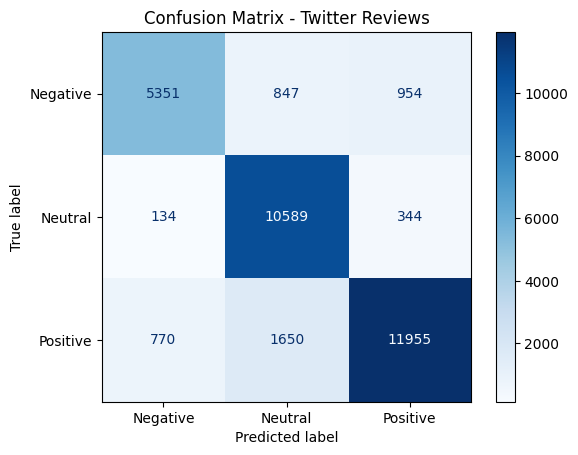

In [16]:
# =========================
# 9. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Twitter Reviews")
plt.show()

C:\Users\saiva\AppData\Local\Temp\ipykernel_3440\2892172353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


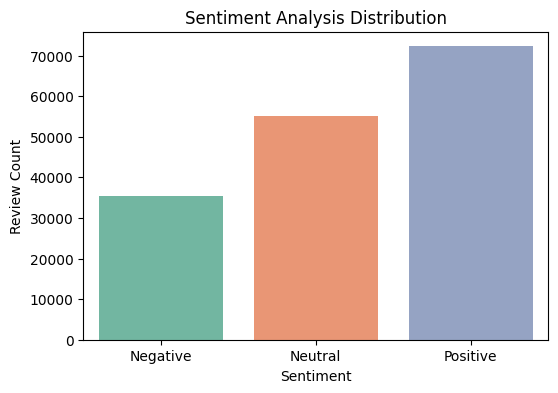

In [17]:
# =========================
# 10. Sentiment Distribution
# =========================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()

In [18]:
# =========================
# 11. Save Model and Vectorizer
# =========================
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/twitter_model.pkl")
joblib.dump(vectorizer, "models/twitter_vectorizer.pkl")
joblib.dump(le, "models/twitter_label_encoder.pkl")
print("Model, vectorizer, and label encoder saved in 'models/' folder.")


# =========================
# 12. Predict on New Reviews
# =========================
test_file = "C:\\Users\\saiva\\Desktop\\Comment mining\\Twitter_Data.csv\\twitter_test.csv"
if os.path.exists(test_file):
    try:
        test_df = pd.read_csv(test_file, encoding='ISO-8859-1')  # <-- Fix here
    except UnicodeDecodeError as e:
        print("Encoding error:", e)
        print("Try opening the CSV in Excel and saving it as UTF-8 CSV.")
    else:
        if 'text' in test_df.columns:
            test_reviews = test_df['text'].fillna("")
            test_vectors = vectorizer.transform(test_reviews)
            test_predictions = model.predict(test_vectors)
            decoded_preds = le.inverse_transform(test_predictions)
            test_df['predicted_sentiment'] = decoded_preds

            print("\nPredictions on New Reviews:")
            print(test_df[['text', 'predicted_sentiment']])

            test_df.to_csv("test_twitter_reviews_with_predictions.csv", index=False)
            print("\nSaved predictions to 'test_twitter_reviews_with_predictions.csv'")
        else:
            print(f"Column 'reviews' not found in {test_file}.")
else:
    print(f"Test file '{test_file}' not found. Skipping prediction.")


Model, vectorizer, and label encoder saved in 'models/' folder.

Predictions on New Reviews:
                                                text predicted_sentiment
0  I love the new iPhone update! Best experience ...            Positive
1  This is the worst customer service Ive ever r...            Negative
2        Had an amazing weekend trip. Feeling great!            Positive
3  The flight delay was ridiculous and poorly han...            Negative
4      So happy with my new laptop, works perfectly.            Positive

Saved predictions to 'test_twitter_reviews_with_predictions.csv'


# Movie Reviews

In [9]:
# =========================
# 1. Load Dataset
# =========================
file_path = "C:\\Users\\saiva\\Desktop\\Comment mining\\IMDB Dataset.csv\\IMDB Dataset.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)

# =========================
# 2. Basic Cleaning
# =========================
df = df[['review', 'target']].dropna()

# =========================
# 3. Label Sentiment
# =========================
def label_sentiment(target):
    if target == 'negative':
        return 'Negative'
    elif target == 'positive':
        return 'Positive'

df['sentiment'] = df['target'].apply(label_sentiment)

# =========================
# 4. TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review'])

# =========================
# 5. Encode Labels
# =========================
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # e.g., [0=Negative, 1=Neutral, 2=Positive]

# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 7. Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# =========================
# 8. Evaluation
# =========================
y_pred = model.predict(X_test)

# Safe classification report
try:
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
except Exception as e:
    print("Warning:", e)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



Columns in dataset: Index(['review', 'target'], dtype='object')

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



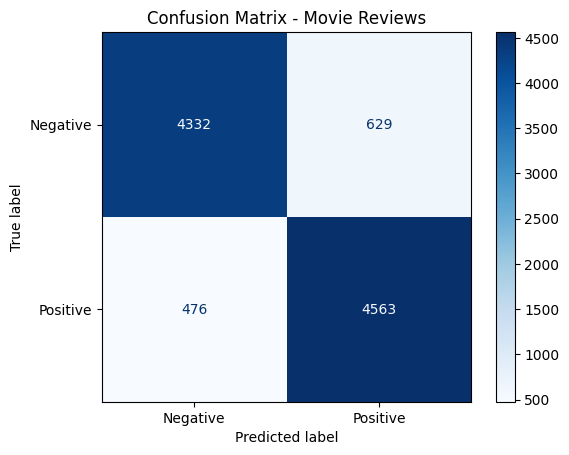

In [10]:
# =========================
# 9. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Movie Reviews")
plt.show()

C:\Users\saiva\AppData\Local\Temp\ipykernel_3440\2892172353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


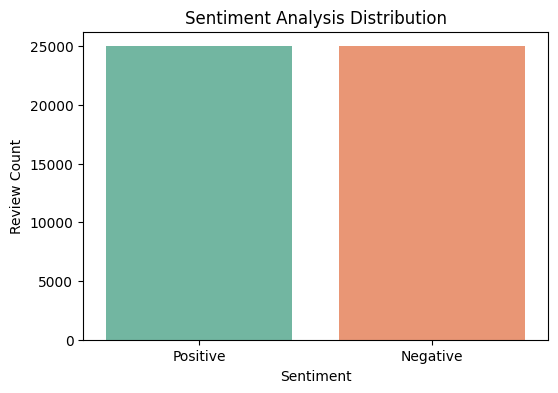

In [21]:
# =========================
# 10. Sentiment Distribution
# =========================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()

In [22]:
# =========================
# 11. Save Model and Vectorizer
# =========================
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/movie_model.pkl")
joblib.dump(vectorizer, "models/movie_vectorizer.pkl")
joblib.dump(le, "models/movie_label_encoder.pkl")
print("Model, vectorizer, and label encoder saved in 'models/' folder.")


# =========================
# 12. Predict on New Reviews
# =========================
test_file = "C:\\Users\\saiva\\Desktop\\Comment mining\\IMDB Dataset.csv\\movie_test.csv"
if os.path.exists(test_file):
    try:
        test_df = pd.read_csv(test_file, encoding='ISO-8859-1')  # <-- Fix here
    except UnicodeDecodeError as e:
        print("Encoding error:", e)
        print("Try opening the CSV in Excel and saving it as UTF-8 CSV.")
    else:
        if 'review' in test_df.columns:
            test_reviews = test_df['review'].fillna("")
            test_vectors = vectorizer.transform(test_reviews)
            test_predictions = model.predict(test_vectors)
            decoded_preds = le.inverse_transform(test_predictions)
            test_df['predicted_sentiment'] = decoded_preds

            print("\nPredictions on New Reviews:")
            print(test_df[['review', 'predicted_sentiment']])

            test_df.to_csv("test_movie_reviews_with_predictions.csv", index=False)
            print("\nSaved predictions to 'test_movie_reviews_with_predictions.csv'")
        else:
            print(f"Column 'reviews' not found in {test_file}.")
else:
    print(f"Test file '{test_file}' not found. Skipping prediction.")

Model, vectorizer, and label encoder saved in 'models/' folder.

Predictions on New Reviews:
                                              review predicted_sentiment
0  Absolutely fantastic movie, brilliant acting a...            Positive
1      I wasted two hours of my life. Total garbage.            Negative
2  The storyline was gripping and emotional. Love...            Positive
3           What a boring mess. Couldnt stay awake.            Negative
4  A delightful experience with a meaningful mess...            Positive

Saved predictions to 'test_movie_reviews_with_predictions.csv'


# Amazon Reviews

In [11]:
# =========================
# 1. Load Dataset
# =========================
file_path = "C:\\Users\\saiva\\Desktop\\Comment mining\\amazon.csv\\train.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)

# =========================
# 2. Basic Cleaning
# =========================
df = df[['text', 'target', 'review_title']].dropna()

# =========================
# 3. Label Sentiment
# =========================
def label_sentiment(rating):
    if rating == 1:
        return 'Negative'
    else:
        return 'Positive'

df['sentiment'] = df['target'].apply(label_sentiment)

# =========================
# 4. TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

# =========================
# 5. Encode Labels
# =========================
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # e.g., [0=Negative, 1=Neutral, 2=Positive]

# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 7. Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# =========================
# 8. Evaluation
# =========================
y_pred = model.predict(X_test)

# Safe classification report
try:
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
except Exception as e:
    print("Warning:", e)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

Columns in dataset: Index(['target', 'review_title', 'text'], dtype='object')

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.85      0.86    103827
    Positive       0.86      0.87      0.86    105875

    accuracy                           0.86    209702
   macro avg       0.86      0.86      0.86    209702
weighted avg       0.86      0.86      0.86    209702



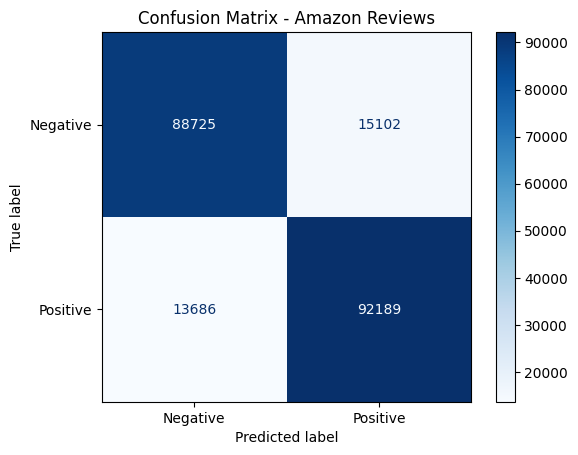

In [12]:
# =========================
# 9. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Amazon Reviews")
plt.show()

C:\Users\saiva\AppData\Local\Temp\ipykernel_3440\2892172353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


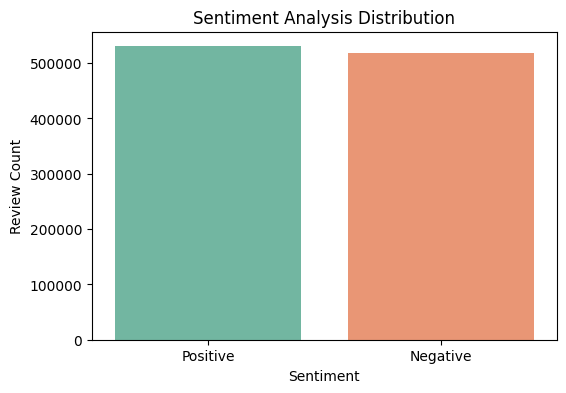

In [25]:
# =========================
# 10. Sentiment Distribution
# =========================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()

In [26]:
# =========================
# 11. Save Model and Vectorizer
# =========================
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/amazon_model.pkl")
joblib.dump(vectorizer, "models/amazon_vectorizer.pkl")
joblib.dump(le, "models/amazon_label_encoder.pkl")
print("Model, vectorizer, and label encoder saved in 'models/' folder.")


# =========================
# 12. Predict on New Reviews
# =========================
test_file = "C:\\Users\\saiva\Desktop\\Comment mining\\amazon.csv\\amazon_test.csv"
if os.path.exists(test_file):
    try:
        test_df = pd.read_csv(test_file, encoding='ISO-8859-1')  # <-- Fix here
    except UnicodeDecodeError as e:
        print("Encoding error:", e)
        print("Try opening the CSV in Excel and saving it as UTF-8 CSV.")
    else:
        if 'text' in test_df.columns:
            test_reviews = test_df['text'].fillna("")
            test_vectors = vectorizer.transform(test_reviews)
            test_predictions = model.predict(test_vectors)
            decoded_preds = le.inverse_transform(test_predictions)
            test_df['predicted_sentiment'] = decoded_preds

            print("\nPredictions on New Reviews:")
            print(test_df[['text', 'predicted_sentiment']])

            test_df.to_csv("test_amazon_reviews_with_predictions.csv", index=False)
            print("\nSaved predictions to 'test_amazon_reviews_with_predictions.csv'")
        else:
            print(f"Column 'reviews' not found in {test_file}.")
else:
    print(f"Test file '{test_file}' not found. Skipping prediction.")



<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\saiva\AppData\Local\Temp\ipykernel_3440\2499599790.py:14: SyntaxWarning: invalid escape sequence '\D'
  test_file = "C:\\Users\\saiva\Desktop\\Comment mining\\amazon.csv\\amazon_test.csv"


Model, vectorizer, and label encoder saved in 'models/' folder.

Predictions on New Reviews:
                                                text predicted_sentiment
0  Despite the fact that I have only played a sma...            Positive
1  I bought this charger in Jul 2003 and it worke...            Negative
2  Firstly,I enjoyed the format and tone of the b...            Positive
3  I have been using this product for a couple ye...            Positive
4  Jim Cole has been ticketed and banned at many ...            Negative

Saved predictions to 'test_amazon_reviews_with_predictions.csv'


In [28]:
# Define mapping of choices to model, vectorizer, and label encoder
model_info = {
    1: {
        "name": "Online Course Reviews",
        "model": "models/coursera_model.pkl",
        "vectorizer": "models/coursera_vectorizer.pkl",
        "label_encoder": None
    },
    2: {
        "name": "Movie Reviews",
        "model": "models/movie_model.pkl",
        "vectorizer": "models/movie_vectorizer.pkl",
        "label_encoder": "models/movie_label_encoder.pkl"
    },
    3: {
        "name": "Employee Feedback",
        "model": "models/employee_model.pkl",
        "vectorizer": "models/employee_vectorizer.pkl",
        "label_encoder": None
    },
    4: {
        "name": "Tweets",
        "model": "models/twitter_model.pkl",
        "vectorizer": "models/twitter_vectorizer.pkl",
        "label_encoder": "models/twitter_label_encoder.pkl"
    },
    5: {
        "name": "Amazon Product Reviews",
        "model": "models/amazon_model.pkl",
        "vectorizer": "models/amazon_vectorizer.pkl",
        "label_encoder": "models/amazon_label_encoder.pkl"
    }
}

# Step 1: Welcome message and options
print("🔍 Welcome to the Sentiment Analyzer!\n")
print("Please select a domain:\n")
for key, val in model_info.items():
    print(f"{key}. {val['name']}")

# Step 2: User selects domain
choice = int(input("\nEnter the number corresponding to your choice (1–5): "))
if choice not in model_info:
    print("❌ Invalid choice. Please restart and try again.")
    exit()

domain = model_info[choice]
print(f"\n✅ You selected: {domain['name']}")

# Step 3: Load model, vectorizer, label encoder using joblib
print("\n⏳ Loading model and vectorizer...")
model = joblib.load(domain["model"])
vectorizer = joblib.load(domain["vectorizer"])
label_encoder = joblib.load(domain["label_encoder"]) if domain["label_encoder"] else None
print("✅ Model and vectorizer loaded.")

# Step 4: Get multiple text inputs
print("\n📝 Enter your texts one by one. Type 'DONE' when you're finished.\n")

texts = []
while True:
    line = input(f"Enter text {len(texts)+1}: ")
    if line.strip().upper() == 'DONE':
        break
    if line.strip() != "":
        texts.append(line.strip())

if not texts:
    print("⚠️ No texts entered. Exiting.")
    exit()

# Step 5: Vectorize and predict
X_input = vectorizer.transform(texts)
predictions = model.predict(X_input)

# Step 6: Decode prediction if label encoder is available
if label_encoder:
    sentiments = label_encoder.inverse_transform(predictions)
else:
    sentiments = predictions

# Step 7: Display all results
print("\n🎯 Sentiment Predictions:")
for i, (text, sentiment) in enumerate(zip(texts, sentiments), 1):
    print(f"\n{i}. Text: {text}\n   ➤ Sentiment: {sentiment}")


🔍 Welcome to the Sentiment Analyzer!

Please select a domain:

1. Online Course Reviews
2. Movie Reviews
3. Employee Feedback
4. Tweets
5. Amazon Product Reviews

✅ You selected: Amazon Product Reviews

⏳ Loading model and vectorizer...
✅ Model and vectorizer loaded.

📝 Enter your texts one by one. Type 'DONE' when you're finished.


🎯 Sentiment Predictions:

1. Text: The delivery was fast and the product quality is excellent!
   ➤ Sentiment: Positive

2. Text: The item arrived broken and customer service was useless.
   ➤ Sentiment: Negative
